# Clustering
## Libraries and Datasets


In [39]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myclustering.R")
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/wine.RData"))

kmeans with 2 clusters

X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,cluster
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1


        1  2  3
ctable 58 71 48
       49  4  1
        9 67 47
[1] 1.0859033 0.3548290 0.8898562


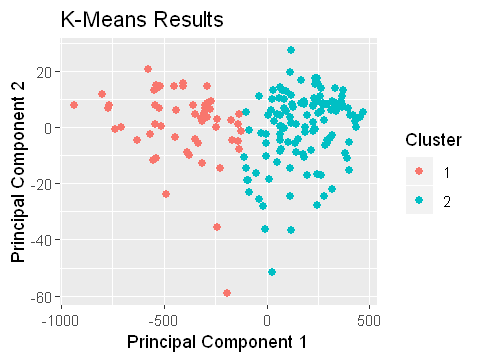

In [40]:
kmeans2 <- clust_kmeans(wine, "X1", 2)
head(kmeans2$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans2$plot)
print(kmeans2$table)
print(kmeans2$entropy)

kmeans with 3 clusters

X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,cluster
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1


        1  2  3
ctable 58 71 48
       45  1  0
        0 50 19
       13 20 29
[1] 1.0859033 0.1047324 0.5885197 1.0479317


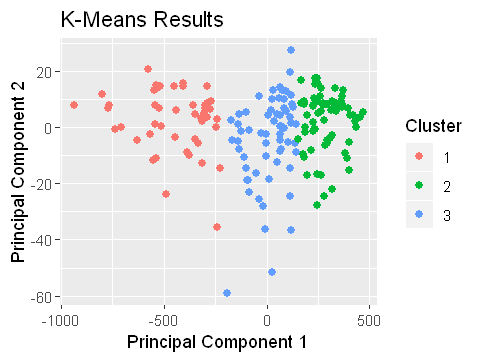

In [41]:
kmeans3 <- clust_kmeans(wine, "X1", 3)
head(kmeans3$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans3$plot)
print(kmeans3$table)
print(kmeans3$entropy)

preprocessing dataset

computing good k

In [42]:
winen <- wine
winen$X1 <- NULL
kmeans_b <- clust_kmeans_best(winen)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans_b$x,kmeans_b$y)

ERROR: Error in clust_kmeans_best(winen): não foi possível encontrar a função "clust_kmeans_best"


In [ ]:
kmeans5 <- clust_kmeans(wine, "X1", 5)
head(kmeans5$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans5$plot)
print(kmeans5$table)
print(kmeans5$entropy)

In [ ]:
winen <- wine
winen$X1 <- NULL
winen = normalize.minmax(winen)[[1]]
winenp <- winen
winen$X1 <- wine$X1

k-means with 3 clusters (preprocessed data)


In [ ]:
kmeans3n <- clust_kmeans(winen, "X1", 3)
head(kmeans3n$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans3n$plot)
print(kmeans3n$table)
print(kmeans3n$entropy)

Computing good k for preprocessed data

In [ ]:
kmeans_b <- clust_kmeans_best(winenp)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans_b$x,kmeans_b$y)

In [ ]:
kmeans4n <- clust_kmeans(winen, "X1", 4)
head(kmeans4n$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans4n$plot)
print(kmeans4n$table)
print(kmeans4n$entropy)

pam (computing best k)

In [ ]:
pamk.result <- pamk(winenp)
pamk.result$nc
table(pamk.result$pamobject$clustering, winen$X1)

pam with 3 clusters

In [ ]:
pam3n <- clust_pam(winen, "X1", 3)
head(pam3n$data)
print(pam3n$table)
print(pam3n$entropy)

db scan

In [ ]:
dbs3n <- clust_dbscan(winen, "X1", eps = 0.425, MinPts = 10)
head(dbs3n$data)
print(dbs3n$table)
print(dbs3n$entropy)
options(repr.plot.width=5, repr.plot.height=4)
plotcluster(winenp, dbs3n$clu$cluster)  

histogram clustering

In [ ]:
idx <- sample(1:dim(winen)[1], 40)
winens <- winen[idx, ]
hc <- hclust(dist(winens), method = "ave")
plot(hc, hang = -1, labels = winen$X1[idx])
rect.hclust(hc, k = 3)
groups <- cutree(hc, k = 3)